**Ariel Saradilla**

**DS33A**

#Assignment Guidance: Hypothesis Testing Concepts

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

In [ ]:
df = pd.read_csv("/content/marketing_campaign.csv", sep='\t')

##**Soal 1: Eksplorasi dan Statistik Deskriptif**
```
 a. Pahami struktur dataset yang digunakan dan identifikasi variabel penting.
 b. Gunakan teknik eksplorasi data untuk mengenali pola dan karakteristik data.
 c. Tampilkan ringkasan statistik deskriptif yang memberikan gambaran tentang distribusi data.
 d. Interpretasikan hasil eksplorasi untuk memahami distribusi data dan kemungkinan
    permasalahan dalam dataset.

Goal: Memahami distribusi dan karakteristik data sebelum melakukan uji hipotesis.


In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

```
Pada uji hipotesis, variabel penting yang dipilih:

Recency(numerik) dan Complain(kategorikal)
→ untuk mengetahui Apakah ada perbedaan waktu kunjungan terakhir antara pelanggan yang pernah komplain  
  dan yang tidak komplain mengujungi?
```

In [ ]:
# Statistik kolom numerik
print(df['Recency'].describe())

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64


In [ ]:
# Distribusi kategori Complain
print(df['Complain'].value_counts()) #0 = tidak, 1 = ya

Complain
0    2219
1      21
Name: count, dtype: int64


In [ ]:
print(df.groupby("Complain")["Recency"].mean())

Complain
0    49.072105
1    53.047619
Name: Recency, dtype: float64


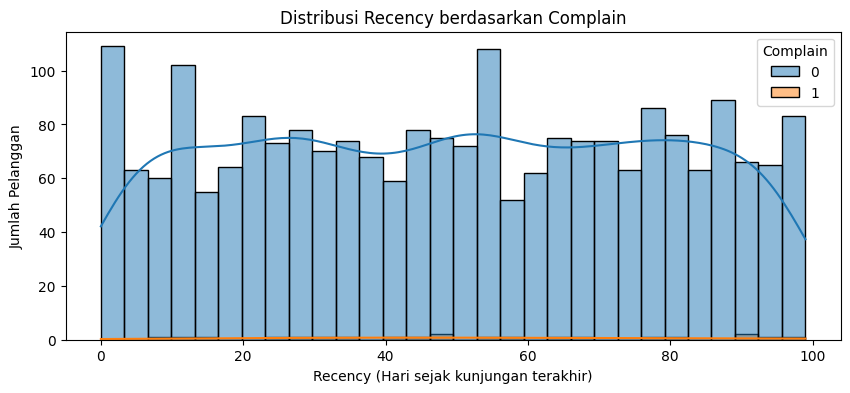

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='Recency', hue='Complain', kde=True, bins=30)
plt.title('Distribusi Recency berdasarkan Complain')
plt.xlabel('Recency (Hari sejak kunjungan terakhir)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

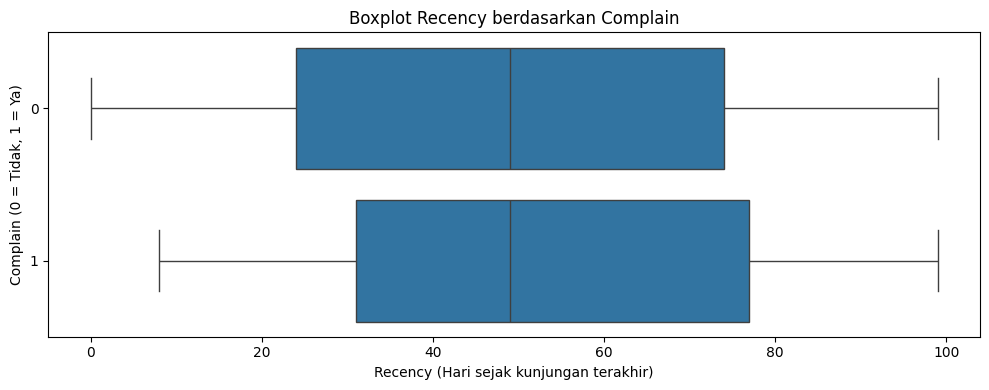

In [ ]:
# Visualisasi boxplot untuk cek outlier pada Recency berdasarkan Complain
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='Recency', y='Complain', orient='h')
plt.title('Boxplot Recency berdasarkan Complain')
plt.xlabel('Recency (Hari sejak kunjungan terakhir)')
plt.ylabel('Complain (0 = Tidak, 1 = Ya)')
plt.tight_layout()
plt.show()

In [ ]:
# Skewness Recency untuk pelanggan yang tidak komplain
skew_0 = skew(df[df['Complain'] == 0]['Recency'])

# Skewness Recency untuk pelanggan yang komplain
skew_1 = skew(df[df['Complain'] == 1]['Recency'])

print(f"Skewness Recency (Complain = 0): {skew_0}")
print(f"Skewness Recency (Complain = 1): {skew_1}")

Skewness Recency (Complain = 0): -0.0025461097270891666
Skewness Recency (Complain = 1): 0.09699672779859346


**Interpretasi hasil eksplorasi**
```
- Pada visual Histogram terlihat berbentuk bimodal, terlihat tidak simetris sempurna dan tidak terlalu jelas arah skewnya.
- Bentuk skew: normal, tidak terlihat mencolok menunjukkan condong kekanan/kiri(hampir simetris).
- Skew ekstrim: tidak terlihat terlalu miring/condong kekanan/kiri.
- Outlier: tidak terlihat outlier mencolok.
- Pada cek skewness, yang tidak complain mendekati 0(tidak miring),
  sedangkan complain agak sedikit kekanan. Sehingga keduanya mendekati simetris


```

##**Soal 2: Uji Hipotesis dan Soal 3: Interpretasi dan Kesimpulan**
```
 a. Definisikan hipotesis yang relevan sesuai dengan tujuan analisis.
 b. Pilih metode uji hipotesis yang sesuai dengan jenis data dan tujuan analisis.
 c. Pastikan pemilihan metode (misalnya t-test, ANOVA, atau Chi-Square)dilakukan dengan mempertimbangkan asumsi
    statistik yang diperlukan.
 d. Hitung nilai p-value dan interpretasikan hasilnya untuk menentukan apakah H0 dapat diterima atau ditolak.

Goal: Menguji hipotesis menggunakan metode statistik yang sesuai dan menginterpretasikan hasilnya.


 e. Analisis hasil uji hipotesis dan hubungkan dengan konteks data.
 f. Tinjau dampak dari hasil analisis terhadap pengambilan keputusan atau
    langkah selanjutnya dalam penelitian.
 g. Pastikan kesimpulan didukung oleh hasil statistik yang diperoleh.

Goal: Menarik kesimpulan berdasarkan hasil analisis statistik.
```

**Hipotesis yang diuji**
```
H0: Tidak terdapat perbedaan waktu kunjungan terakhir (Recency) antara pelanggan yang komplain dan yang tidak komplain.
H1: Terdapat perbedaan waktu kunjungan terakhir (Recency) antara pelanggan yang komplain dan yang tidak komplain.

Hipotesis 2 sisi
H₀: 𝜇1 = 𝜇2
H₁: 𝜇1 != 𝜇2
```

**Metode yang dipilih**
```
Dari interpretasikan hasil eksplorasi tersebut maka menggunakan Two Sample T-test (Independent) karena:
- Menguji 2 sisi yaitu apakah tidak ada perbedaan rata-rata atau ada perbedaan rata-rata.
- 2 grup(recency dan complain) tidak berhubungan dan berasal dari populasi berbeda.
- Pada visualisasi histogram menunjukkan distribusi mendekati normal tidak terlalu miring terlihat dari rentang (1-100),
  dan boxplot tidak menunjukkan adanya outlier mencolok.
- Kelompok tidak saling bergantung(independent).
```

**Menguji distribusi**
```
Apakah data terdistribusi normal atau tidak dengan:
- p-value > 0.05: distribusi normal.
- p-value <= 0.05: distribusi tidak normal.

Memastikan apakah bisa menggunakan uji T-test(dimana distribusi harus normal).
```

In [ ]:
# Shapiro-Wilk Test untuk Recency berdasarkan Complain = 0 (Tidak Komplain)
stat_0, p_0 = shapiro(df[df['Complain'] == 0]['Recency'])
print(f"Statistik Complain = 0: {stat_0:.2f},\nP-value Complain = 0: {p_0}")

Statistik Complain = 0: 0.95,
P-value Complain = 0: 6.92428701280934e-26


In [ ]:
# Shapiro-Wilk Test untuk Recency berdasarkan Complain = 1 (Komplain)
stat_1, p_1 = shapiro(df[df['Complain'] == 1]['Recency'])
print(f"Statistik Complain = 1: {stat_1:.2f},\nP-value Complain = 1: {p_1:.5f}")

Statistik Complain = 1: 0.95,
P-value Complain = 1: 0.36316


```
Hasil shapiro-Wilk Test:
- Complain = 0, p-value = 0 berarti distribusi tidak normal.
- Complain = 1, p-value = 0,3632 berarti distribusi normal.

Terdapat salah satu terdistribusi tidak normal maka lebih baik menggunakan Mann-Whitney.
Tidak perlu cek variansi homogen/non homogen dengan Lavene's
```

**Uji Mann-Whitney**
```
Apakah menolak H0 atau tidak
- p < 0.05: menolak H0
- p >= 0.05: Gagal menolak H0
```

In [ ]:
Komplain_0 = df[df['Complain'] == 0]['Recency']
Komplain_1 = df[df['Complain'] == 1]['Recency']

stat, p = mannwhitneyu(Komplain_0, Komplain_1)
print(f"Statistik Uji: {stat}, P-value: {p:.5f}")

Statistik Uji: 21446.5, P-value: 0.53000


```
Hasil uji hipotesisnya bahwa p-value(0,53 > 0,05) berarti gagal menolak H0(menerima H0).

Maka tidak ada cukup bukti bahwa ada perbedaan yang signifikan secara statistik,
dalam waktu kunjungan terakhir (Recency) antara pelanggan yang pernah komplain dan yang tidak.

```

**Inti kesimpulan berdasarkan statistik**
```
- Hasil rata-rata Recency berdasarkan nilai Complain:
  1. Complain = 0 → 49.07
  2. Complain = 1 → 53.05

- Distribusi(Shapiro-Wilk Test):
  1. Complain = 0 → distribusi tidak normal
  2. Complain = 1 → distribusi normal

- Mann-Whitney two sample:
  p-value(0.53 > 0.05)  

Meskipun mean pada recency yang complain sedikit lebih tinggi dibanding tidak complain, hasil uji Mann-Whitney berupa
p-value > 0.05 menunjukkan gagal menolak H0 yang berarti tidak cukup bukti ada perbedaan tersebut dalam waktu
kunjungan terakhir(Recency) antara pelanggan yang pernah komplain dan yang tidak.
  
